<a href="https://colab.research.google.com/github/fcastellanosp/MINE-4206_202410_AML/blob/main/Talleres/Taller%203/Taller%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

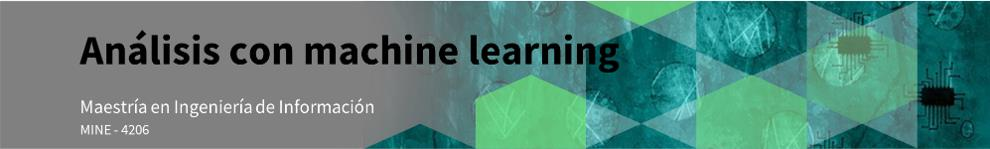

- **Integrante 1:** Lina María Gómez Mesa
- **Integrante 2:** María Catalina Ibáñez Piñeres

---
# Contexto y objetivos.

En la actualidad, la cantidad de artículos publicados en Internet está generando una gran ola de información accesible por cualquier usuario, dando a conocer diferentes puntos de vista, opiniones, información e investigaciones sobre diferentes temas de interés.

Esta gran cantidad de información no solo permite una búsqueda exhaustiva sobre un tema, también permite realizar un análisis sobre la tendencia de los diferentes temas que estén dando de qué hablar en una sociedad. Es por ello que un grupo de expertos se ha dado la tarea de analizar 10.000 artículos web y clasificarlos para poder establecer un análisis de los temas en la actualidad.

Para ello, como experto en análisis con machine learning, le han pedido que construya un modelo capaz de clasificar los nuevos artículos, realice un análisis de cuáles son los temas que dan de que hablar y automatice el proceso de selección y búsqueda de diferentes artículos.

**Objetivos de desarrollo**:

* Realizar el análisis y limpieza de textos.
* Explorar las diferentes técnicas de transformación de datos no estructurados.
* Establecer el mejor modelo basado en una red neuronal.

**Datos**: La fuente de los datos la puedes encontrar en [News Articles Classification Dataset for NLP & ML](https://www.kaggle.com/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml).

# Entendimiento del negocio.

Para tener un mejor detalle sobre el comportamiento de las variables, solicitamos a la organización el diccionario de datos y nos suministró la siguiente información:

| ATRIBUTO | DEFINICIÓN |
| :- | :- |
| **headlines** | Titular del artículo.|
| **description** | Reseña del artículo.|
| **content** | Contenido del artículo.|
| **url** | Dirección web del artículo.|
| **category** | Representa la temática del artículo.|

# Actividades a realizar.

1. Realizar el análisis exploratorio de componentes principales en la información.

2. Identificar el número de componentes principales apropiado el procesamiento. Genera una tabla comparativa y los gráficos que apoyen este proceso. Recuerda que no deben truncarse los textos. Por último, la elección del número de componentes debe estar debidamente justificada.

3. Construir la red neuronal tomando como insumo los componentes principales procesados en el punto anterior.

4. Construir las gráficas de entrenamiento, validación. Debes interpretar los resultados obtenidos para este modelo base.

5. Realizar la identificación de hiperparámetros, justificando la elección de los valores correspondientes.

**NOTA**: La calificación será sobre notebook ejecutado y cargado en Bloque Neón junto con el archivo HTML.

# 0. Importar librerías

In [8]:
!pip install pandas-profiling
!pip install contractions
!pip install polyglot
!pip install pyicu
!pip install pycld2
!pip install swifter

In [9]:
! pip install -q kaggle
from google.colab import files
files.upload()

{}

In [10]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Analisis profundo de datos

from ydata_profiling import ProfileReport

#Entrenamiento del modelo
import sklearn
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import classification_report, confusion_matrix, PrecisionRecallDisplay

#Textos

import contractions
import inflect
import nltk
import re, string, unicodedata
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from polyglot.detect import Detector
from wordcloud import WordCloud, STOPWORDS

#Tensorflow y keras
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

#Sistema operativo
import os
import os.path as osp

#Librerías extras
import itertools
from datetime import datetime

print(f"La versión de sklearn es: {sklearn.__version__}")
print(f'La versión de Tensor Flow es:', tf.__version__)

La versión de sklearn es: 1.2.2
La versión de Tensor Flow es: 2.15.0


In [11]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

# 1. Introducción a los datos

## 1.1. Configuración del entorno de kaggle

Se hace la conexión con kaggle para poder descargar la base de datos.

In [12]:
!ls -lha kaggle.json
!if [ ! -d ~/.kaggle ]; then mkdir ~/.kaggle; fi
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 64 Apr 13 11:23 kaggle.json


Se verifica la conectividad con el entorno de kaggle.

In [13]:
!kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                           Online Food Dataset                               3KB  2024-03-02 18:50:30          24724        491  0.9411765        
sukhmandeepsinghbrar/most-subscribed-youtube-channel          Most Subscribed YouTube Channel                   1KB  2024-04-10 20:33:05            769         30  1.0              
sanyamgoyal401/customer-purchases-behaviour-dataset           Customer Purchases Behaviour Dataset              1MB  2024-04-06 18:42:01           1283         34  1.0              
mohdshahnawazaadil/credit-card-dataset                        Credit Card Dataset         

Se descarga la base de datos.

In [14]:
!kaggle datasets download banuprakashv/news-articles-classification-dataset-for-nlp-and-ml

 90% 5.00M/5.57M [00:00<00:00, 46.5MB/s]
100% 5.57M/5.57M [00:00<00:00, 50.6MB/s]


In [15]:
ROOT_DIR = 'content'
DATASET_NAME = 'news-articles-classification-dataset-for-nlp-and-ml'

In [16]:
print(f"!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}")

!unzip news-articles-classification-dataset-for-nlp-and-ml.zip -d content/news-articles-classification-dataset-for-nlp-and-ml


Se descomprime el archivo en una carpeta previamente creada llamada content

In [17]:
#%cd {ROOT_DIR}
!mkdir content
!mkdir content/{DATASET_NAME}
!unzip {DATASET_NAME}.zip -d {ROOT_DIR}/{DATASET_NAME}

Archive:  news-articles-classification-dataset-for-nlp-and-ml.zip
  inflating: content/news-articles-classification-dataset-for-nlp-and-ml/business_data.csv  
  inflating: content/news-articles-classification-dataset-for-nlp-and-ml/education_data.csv  
  inflating: content/news-articles-classification-dataset-for-nlp-and-ml/entertainment_data.csv  
  inflating: content/news-articles-classification-dataset-for-nlp-and-ml/sports_data.csv  
  inflating: content/news-articles-classification-dataset-for-nlp-and-ml/technology_data.csv  


Se genera la ruta del directorio para cargar la información.

In [18]:
DATA_DIR = f"{ROOT_DIR}/{DATASET_NAME}"
print(DATA_DIR)

content/news-articles-classification-dataset-for-nlp-and-ml


## 1.2. Separación de la información.

Se listan los archivos dentro de la carpeta

In [19]:
csv_files = os.listdir(DATA_DIR)

train_df = pd.DataFrame()
test_df = pd.DataFrame()

for csv_file in csv_files:
  new_df = pd.read_csv(osp.join(DATA_DIR, csv_file))
  train, test = train_test_split(new_df, test_size=0.2, random_state=19)
  train_df = pd.concat([train_df, train])
  test_df = pd.concat([test_df, test])

train_df.sample(5)

headlines  \
1818  Jadeja to test fitness in Ranji game ahead of ...   
1378  Shalini Pandey answers if she would have been ...   
1534               M&M profit jumps 98% in June quarter   
1828  Everything you need to know about the rare ‘ri...   
990   From iQOO 12 to OnePlus 12: Upcoming phones th...   

                                            description  \
1818  After Bumrah fitness fiasco, BCCI taking no ch...   
1378  Shalini Pandey played the leading role in Sand...   
1534  Revenue from operations during the quarter ros...   
1828  During the annular solar eclipse on October 14...   
990   These high-end smartphones with enhanced perfo...   

                                                content  \
1818  Given what happened with pacer Jasprit Bumrah,...   
1378  Actor Shalini Pandey comes from a non-filmy fa...   
1534  Automaker Mahindra & Mahindra reported a stand...   
1828  A rare “annular” solar eclipse is set to happe...   
990   Android smartphone brands are getting ready to...   

                                                    url       category  
1818  https://indianexpress.com/article/sports/crick...         sports  
1378  https://indianexpress.com/article/entertainmen...  entertainment  
1534  https://indianexpress.com/article/business/mm-...       business  
1828  https://indianexpress.com/article/technology/s...     technology  
990   https://indianexpress.com/article/technology/t...     technology

Se mira el número de instancias para cada uno de los conjuntos de datos.

In [20]:
train_count = train_df.shape[0]
test_count = test_df.shape[0]

print("-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------")
print(f"-> Train: {train_count:,}")
print(f"-> Test: {test_count:,}")

-------------------SEPARACIÓN DE LA INFORMACIÓN-------------------
-> Train: 8,000
-> Test: 2,000


Se verifican las categorías

In [21]:
train_df["category"].value_counts()

category
sports           1600
education        1600
business         1600
entertainment    1600
technology       1600
Name: count, dtype: int64

In [22]:
test_df["category"].value_counts()

category
sports           400
education        400
business         400
entertainment    400
technology       400
Name: count, dtype: int64

Se definen las variables X e Y para el modelo

In [23]:
target_feature = 'category'

In [24]:
x_feature = 'content'

Se genera una copia de la información para no modificar la original para el proceso exploratorio de transformación de los datos:

In [25]:
X_train_trans = train_df.copy()
X_train_trans

headlines  \
636   Citing complaint against Brij Bhushan, UWW mov...   
161   ‘Virat Kohli and I have been texting for a few...   
855   Lawmakers ask EU countries to pressure IOC for...   
24    India vs England Live Streaming, 1st Test: Whe...   
252   Mohammed Shami likely to miss 2 Tests against ...   
...                                                 ...   
936    Facts About Fiction: How to spot fake online ads   
1378  Japan moon mission to kick off on Sept 7, will...   
757   Apple iOS 17.2: From Journal app to live stick...   
622   Indian astronaut on the Moon by 2040: ISRO cha...   
1629  Failed star is a record-breaking ‘Jupiter’ hot...   

                                            description  \
636   Asian Championships to be held in New Delhi fr...   
161   Virat Kohli also shared a funny anecdote about...   
855   IOC president Thomas Bach and the IOC have fac...   
24    India vs England 1st Test Live Streaming: The ...   
252   Mohammad Shami has not started bowling post hi...   
...                                                 ...   
936   Online fraud through advertisements is an easy...   
1378  This is the first Moon-landing attempt being m...   
757   From the much-anticipated Journal app to chang...   
622   ISRO chairman S Somanath said the space agency...   
1629  A newly-discovered "hot-Jupiter" has a surface...   

                                                content  \
636   India is set to lose the hosting rights of the...   
161   They have never met each other, but over the l...   
855   European Union lawmakers have condemned the In...   
24    IND vs ENG 1st Test Live Streaming Details: In...   
252   Fast bowler Mohammed Shami is likely to miss t...   
...                                                 ...   
936   Apart from stopping yourself from clicking on ...   
1378  Japan, which had to put off the launch of its ...   
757   Apple has been testing iOS 17.2 for quite a wh...   
622   Following the success of the Chandrayaan-3 mis...   
1629  Hot Jupiters are curious cosmic bodies. They a...   

                                                    url    category  
636   https://indianexpress.com/article/sports/sport...      sports  
161   https://indianexpress.com/article/sports/crick...      sports  
855   https://indianexpress.com/article/sports/crick...      sports  
24    https://indianexpress.com/article/sports/crick...      sports  
252   https://indianexpress.com/article/sports/crick...      sports  
...                                                 ...         ...  
936   https://indianexpress.com/article/technology/a...  technology  
1378  https://indianexpress.com/article/technology/s...  technology  
757   https://indianexpress.com/article/technology/t...  technology  
622   https://indianexpress.com/article/technology/s...  technology  
1629  https://indianexpress.com/article/technology/s...  technology  

[8000 rows x 5 columns]

## 1.3. Exploración de los datos

Se va a generar un `WordCloud` para visualizar las palabras más frecuentes en las categorías.

Se inicia definiendo una función:

In [26]:
def show_wordcloud(palabras,stopwords=[]):
    comment_words = ''

    # iterate through the csv file
    for val in palabras:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

Se genera el llamada para cada una de las clases:

---------- Words for class: sports ----------


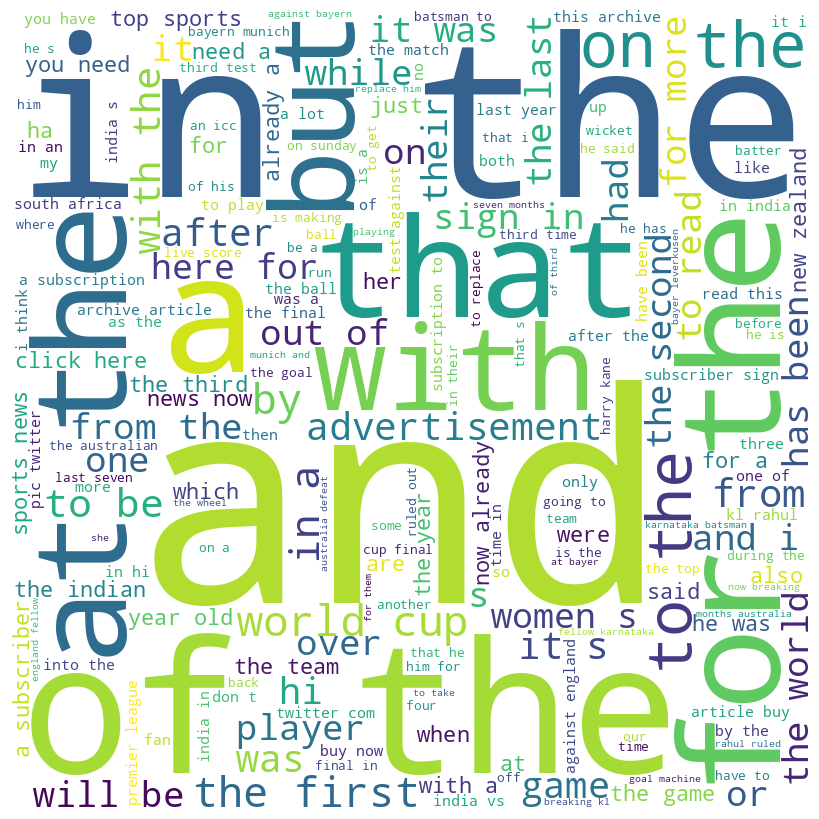

---------- Words for class: education ----------


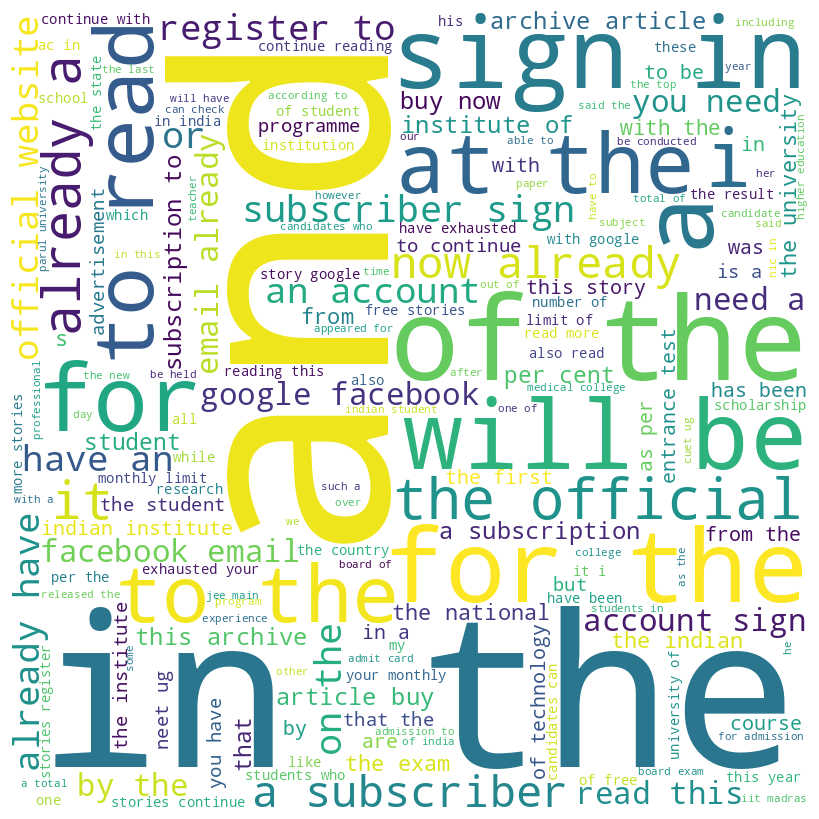

---------- Words for class: business ----------


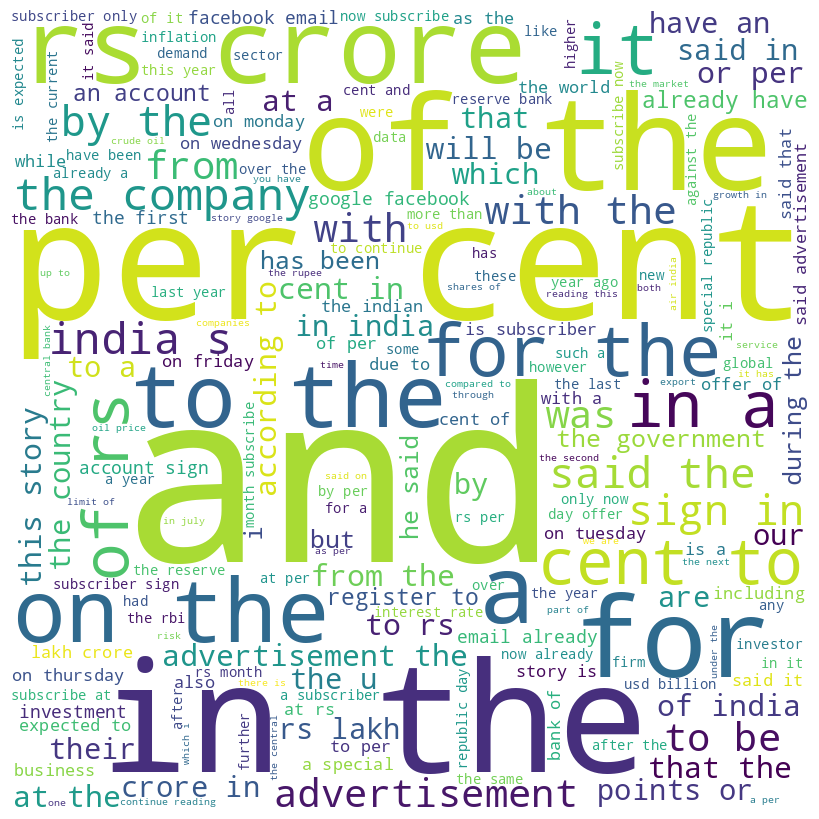

---------- Words for class: entertainment ----------


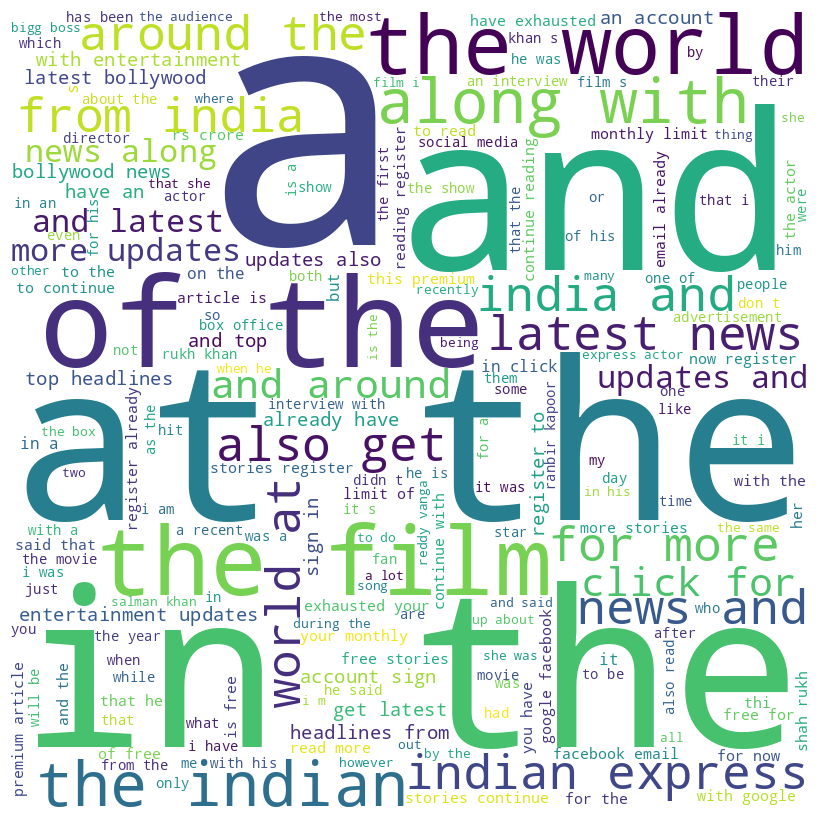

---------- Words for class: technology ----------


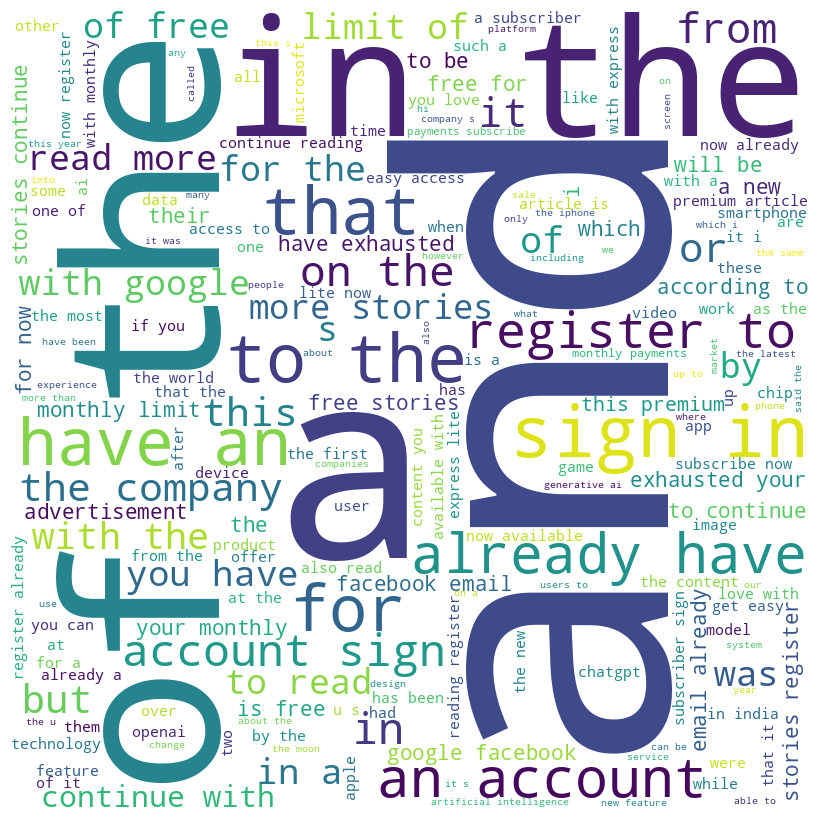

In [27]:
for i in train_df[target_feature].unique():
    print(f'---------- Words for class: {i} ----------')
    show_wordcloud(train_df.loc[train_df[target_feature]==i, x_feature])

Como se puede ver, hay varias palabras que se repiten en las diferentes categorías, lo que puede generar ruido en el modelo, ya que no aportan mucha información, esas palabras se conocen como `stopwords`. Se va a proceder a eliminarlas y a realizar un nuevo `WordCloud` para visualizar las palabras más frecuentes en las categorías.

In [28]:
stop_words = stopwords.words('english')

---------- Words for class: sports ----------


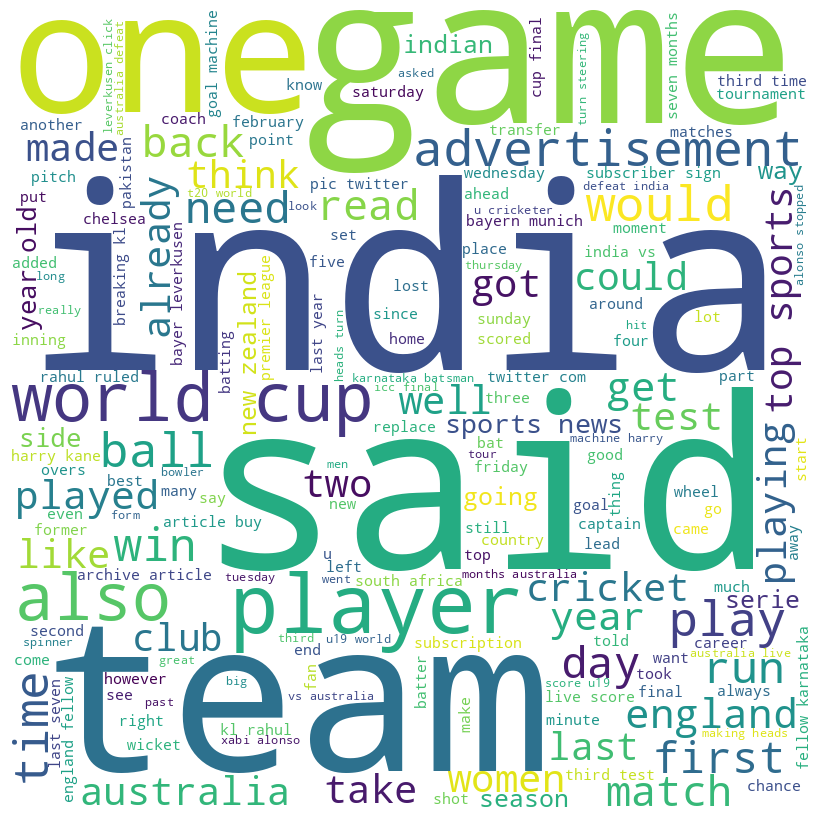

---------- Words for class: education ----------


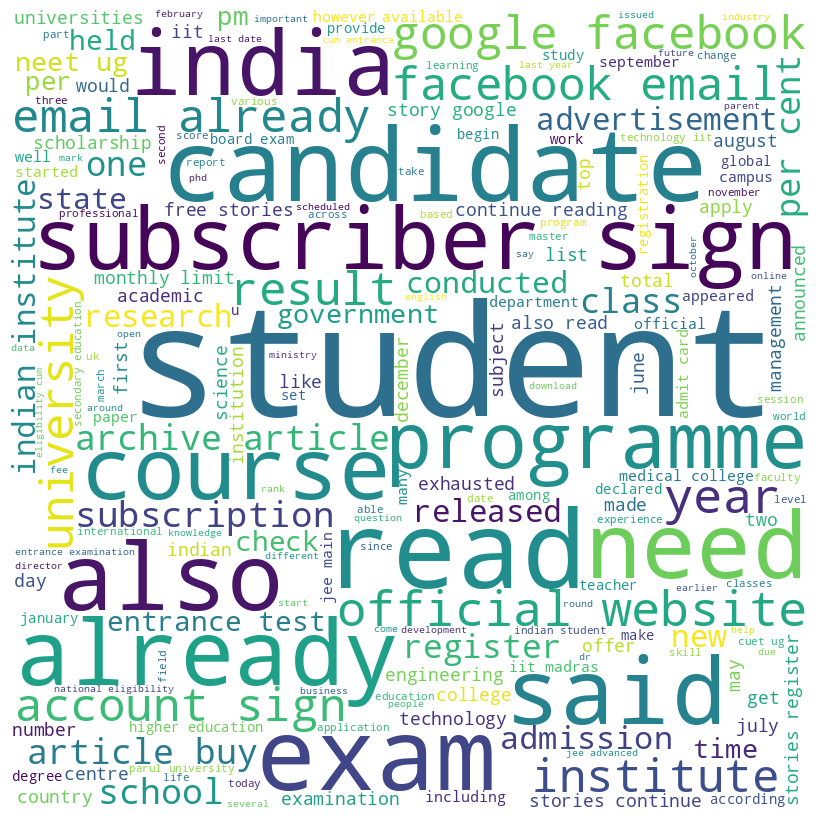

---------- Words for class: business ----------


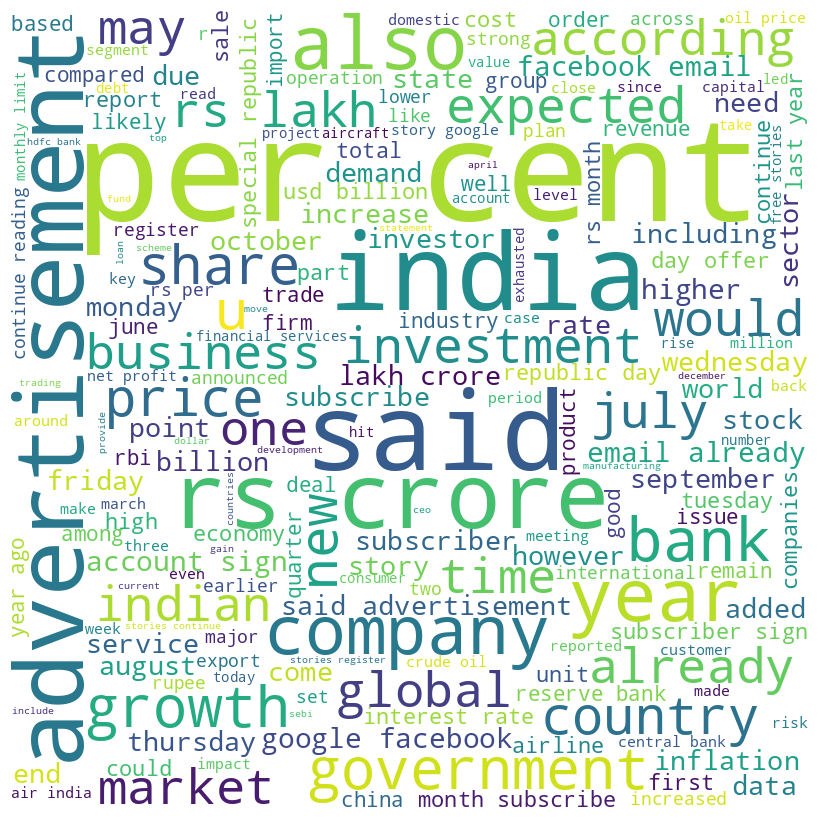

---------- Words for class: entertainment ----------


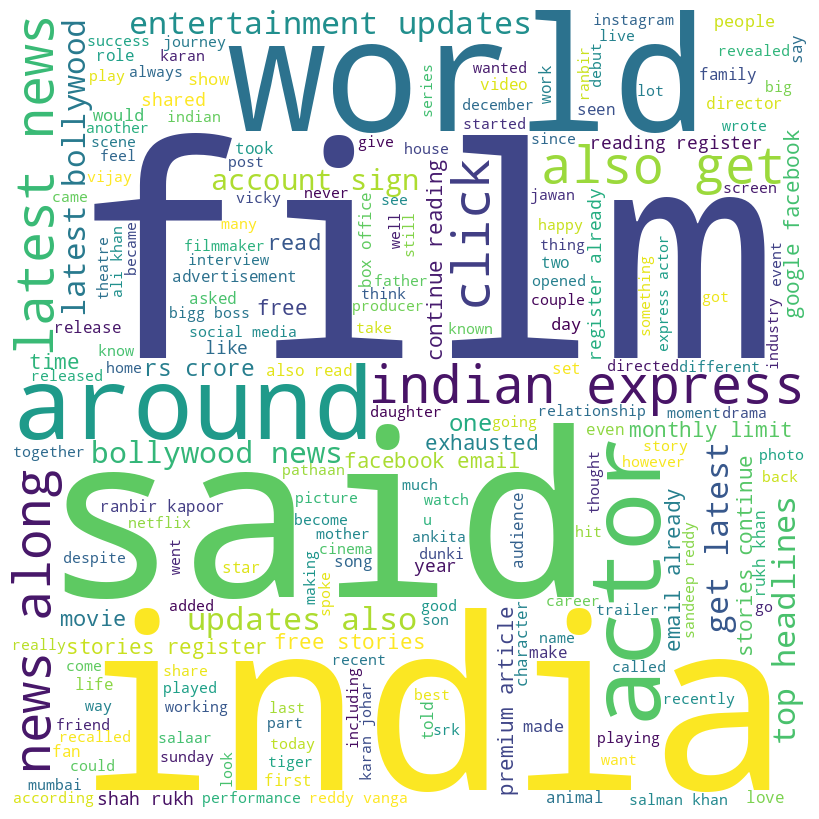

---------- Words for class: technology ----------


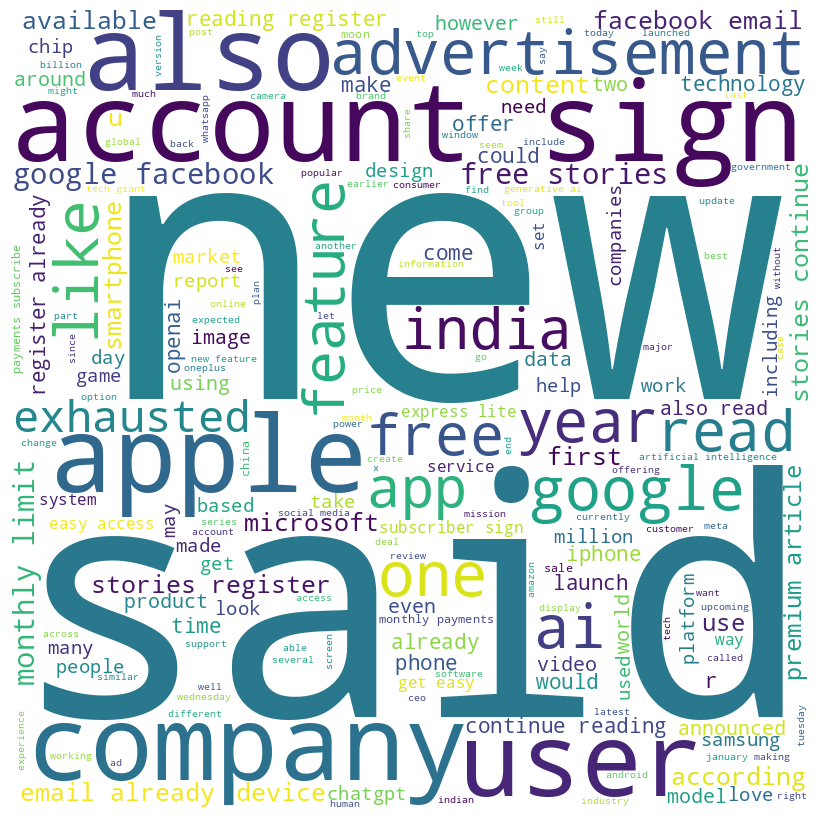

In [29]:
for i in train_df[target_feature].unique():
    print(f'---------- Words for class: {i} ----------')
    show_wordcloud(train_df.loc[train_df[target_feature]==i, x_feature], stop_words)

Asimismo, es importante revisar que todas las palabras se encuentren en el mismo idioma dado que este proceso es sensible al idioma. Para ello, se toma la función _set_language_ la cual utiliza la librería polyglot para reconocer en qué idioma se encuentra la mayoría de las filas. El resultado es que la mayoría se encuentra en: **inglés**.

In [30]:
def set_language(val):
  lang = Detector(str(val)).language.name.lower()
  return lang

train_df["language"] = train_df[x_feature].apply(set_language)
print(f"El lenguaje predominante es: {train_df['language'].unique()[0]}")

El lenguaje predominante es: english


**Nota**: Dado que el único que lenguaje que aparece es inglés no se eliminan registros.

## 1.4. Preparación de la información

Inicialmente, se separa tanto la variable objetivo como la variable independiente. Además, se convierte los valores targets en valores numéricos para que sean entendibles por el algoritmo.

In [31]:
label_encoder = LabelEncoder()
train_df[target_feature] = label_encoder.fit_transform(train_df[target_feature])
test_df[target_feature] = label_encoder.fit_transform(test_df[target_feature])

unique_labels = label_encoder.classes_
for num_value, original_label in enumerate(unique_labels):
    print(f'Valor numérico: {num_value}, Etiqueta original: {original_label}')

Valor numérico: 0, Etiqueta original: business
Valor numérico: 1, Etiqueta original: education
Valor numérico: 2, Etiqueta original: entertainment
Valor numérico: 3, Etiqueta original: sports
Valor numérico: 4, Etiqueta original: technology


Se realiza separación de _train_:

In [32]:
X_train, Y_train = train_df[x_feature], train_df[target_feature]
display(X_train)
Y_train

636     India is set to lose the hosting rights of the...
161     They have never met each other, but over the l...
855     European Union lawmakers have condemned the In...
24      IND vs ENG 1st Test Live Streaming Details: In...
252     Fast bowler Mohammed Shami is likely to miss t...
                              ...                        
936     Apart from stopping yourself from clicking on ...
1378    Japan, which had to put off the launch of its ...
757     Apple has been testing iOS 17.2 for quite a wh...
622     Following the success of the Chandrayaan-3 mis...
1629    Hot Jupiters are curious cosmic bodies. They a...
Name: content, Length: 8000, dtype: object

636     3
161     3
855     3
24      3
252     3
       ..
936     4
1378    4
757     4
622     4
1629    4
Name: category, Length: 8000, dtype: int64

Se realiza separación de _test_:

In [33]:
X_test, Y_test = test_df[x_feature], test_df[target_feature]
display(X_test)
Y_test

321     South Africa’s David Bedingham reveals he used...
1775    Former New Zealand cricketer Craig Cumming is ...
953     India off-spinner Ravichandran Ashwin on Wedne...
529     Pakistan have had a grandfather, son, and gran...
1878    Union Berlin came from behind to beat Hoffenhe...
                              ...                        
1006    Amazon.com has cut around 180 jobs in its game...
1272    Ever since the launch of ChatGPT in November 2...
1497    Google is a search engine that indexes the ent...
1756    I have an emotional relationship with thin-and...
921     SpaceX’s uncrewed spacecraft Starship, develop...
Name: content, Length: 2000, dtype: object

321     3
1775    3
953     3
529     3
1878    3
       ..
1006    4
1272    4
1497    4
1756    4
921     4
Name: category, Length: 2000, dtype: int64

Se propone:

- Eliminación del Ruido.
- Tokenización.
- Normalización.

In [36]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('english')):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

#### 1.4.1 Tokenización

Ahora se aplica la función a la columna X_feature y se aplica el pre-procesamiento de los datos. Para ello se crea una función que realice las siguientes tareas:
* Pasar a minúsculas.
* Reemplazar los números por su correspondiente palabra.
* Eliminar los signos de puntuación.
* Eliminar caracteres especiales.
* Eliminar stopwords.

In [37]:
X_train_new = X_train.apply(word_tokenize)
X_train_new = X_train_new.apply(preprocessing) #Aplica la eliminación del ruido
X_train_new.head()

636    [india, set, lose, hosting, rights, asian, wre...
161    [never, met, last, years, virat, kohli, novak,...
855    [european, union, lawmakers, condemned, intern...
24     [ind, vs, eng, 1st, test, live, streaming, det...
252    [fast, bowler, mohammed, shami, likely, miss, ...
Name: content, dtype: object

In [38]:
X_train_trans['trans'] = X_train_trans['content'].apply(nltk.word_tokenize,language="english").apply(preprocessing)
X_train_trans

headlines  \
636   Citing complaint against Brij Bhushan, UWW mov...   
161   ‘Virat Kohli and I have been texting for a few...   
855   Lawmakers ask EU countries to pressure IOC for...   
24    India vs England Live Streaming, 1st Test: Whe...   
252   Mohammed Shami likely to miss 2 Tests against ...   
...                                                 ...   
936    Facts About Fiction: How to spot fake online ads   
1378  Japan moon mission to kick off on Sept 7, will...   
757   Apple iOS 17.2: From Journal app to live stick...   
622   Indian astronaut on the Moon by 2040: ISRO cha...   
1629  Failed star is a record-breaking ‘Jupiter’ hot...   

                                            description  \
636   Asian Championships to be held in New Delhi fr...   
161   Virat Kohli also shared a funny anecdote about...   
855   IOC president Thomas Bach and the IOC have fac...   
24    India vs England 1st Test Live Streaming: The ...   
252   Mohammad Shami has not started bowling post hi...   
...                                                 ...   
936   Online fraud through advertisements is an easy...   
1378  This is the first Moon-landing attempt being m...   
757   From the much-anticipated Journal app to chang...   
622   ISRO chairman S Somanath said the space agency...   
1629  A newly-discovered "hot-Jupiter" has a surface...   

                                                content  \
636   India is set to lose the hosting rights of the...   
161   They have never met each other, but over the l...   
855   European Union lawmakers have condemned the In...   
24    IND vs ENG 1st Test Live Streaming Details: In...   
252   Fast bowler Mohammed Shami is likely to miss t...   
...                                                 ...   
936   Apart from stopping yourself from clicking on ...   
1378  Japan, which had to put off the launch of its ...   
757   Apple has been testing iOS 17.2 for quite a wh...   
622   Following the success of the Chandrayaan-3 mis...   
1629  Hot Jupiters are curious cosmic bodies. They a...   

                                                    url    category  \
636   https://indianexpress.com/article/sports/sport...      sports   
161   https://indianexpress.com/article/sports/crick...      sports   
855   https://indianexpress.com/article/sports/crick...      sports   
24    https://indianexpress.com/article/sports/crick...      sports   
252   https://indianexpress.com/article/sports/crick...      sports   
...                                                 ...         ...   
936   https://indianexpress.com/article/technology/a...  technology   
1378  https://indianexpress.com/article/technology/s...  technology   
757   https://indianexpress.com/article/technology/t...  technology   
622   https://indianexpress.com/article/technology/s...  technology   
1629  https://indianexpress.com/article/technology/s...  technology   

                                                  trans  
636   [india, set, lose, hosting, rights, asian, wre...  
161   [never, met, last, years, virat, kohli, novak,...  
855   [european, union, lawmakers, condemned, intern...  
24    [ind, vs, eng, 1st, test, live, streaming, det...  
252   [fast, bowler, mohammed, shami, likely, miss, ...  
...                                                 ...  
936   [apart, stopping, clicking, suspicious, links,...  
1378  [japan, put, launch, moon, mission, last, week...  
757   [apple, testing, ios, 172, quite, update, expe...  
622   [following, success, chandrayaan3, mission, mo...  
1629  [hot, jupiters, curious, cosmic, bodies, kind,...  

[8000 rows x 6 columns]

#### 1.4.2 Normalización

Para la normalización de los datos se realiza una eliminación de prefijos y sufijos, además de realizar una lemmatización de los verbos.

In [39]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer('english')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

In [40]:
X_train_new = X_train_new.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
X_train_new.head()

636    [india, set, lose, host, right, asian, wrestl,...
161    [never, meet, last, year, virat, koh, novak, d...
855    [european, union, lawmak, condemn, intern, oly...
24     [ind, vs, eng, 1st, test, live, stream, detail...
252    [fast, bowler, moham, shami, like, miss, first...
Name: content, dtype: object

In [41]:
X_train_trans['trans'] = X_train_trans['trans'].apply(stem_words)
X_train_trans

headlines  \
636   Citing complaint against Brij Bhushan, UWW mov...   
161   ‘Virat Kohli and I have been texting for a few...   
855   Lawmakers ask EU countries to pressure IOC for...   
24    India vs England Live Streaming, 1st Test: Whe...   
252   Mohammed Shami likely to miss 2 Tests against ...   
...                                                 ...   
936    Facts About Fiction: How to spot fake online ads   
1378  Japan moon mission to kick off on Sept 7, will...   
757   Apple iOS 17.2: From Journal app to live stick...   
622   Indian astronaut on the Moon by 2040: ISRO cha...   
1629  Failed star is a record-breaking ‘Jupiter’ hot...   

                                            description  \
636   Asian Championships to be held in New Delhi fr...   
161   Virat Kohli also shared a funny anecdote about...   
855   IOC president Thomas Bach and the IOC have fac...   
24    India vs England 1st Test Live Streaming: The ...   
252   Mohammad Shami has not started bowling post hi...   
...                                                 ...   
936   Online fraud through advertisements is an easy...   
1378  This is the first Moon-landing attempt being m...   
757   From the much-anticipated Journal app to chang...   
622   ISRO chairman S Somanath said the space agency...   
1629  A newly-discovered "hot-Jupiter" has a surface...   

                                                content  \
636   India is set to lose the hosting rights of the...   
161   They have never met each other, but over the l...   
855   European Union lawmakers have condemned the In...   
24    IND vs ENG 1st Test Live Streaming Details: In...   
252   Fast bowler Mohammed Shami is likely to miss t...   
...                                                 ...   
936   Apart from stopping yourself from clicking on ...   
1378  Japan, which had to put off the launch of its ...   
757   Apple has been testing iOS 17.2 for quite a wh...   
622   Following the success of the Chandrayaan-3 mis...   
1629  Hot Jupiters are curious cosmic bodies. They a...   

                                                    url    category  \
636   https://indianexpress.com/article/sports/sport...      sports   
161   https://indianexpress.com/article/sports/crick...      sports   
855   https://indianexpress.com/article/sports/crick...      sports   
24    https://indianexpress.com/article/sports/crick...      sports   
252   https://indianexpress.com/article/sports/crick...      sports   
...                                                 ...         ...   
936   https://indianexpress.com/article/technology/a...  technology   
1378  https://indianexpress.com/article/technology/s...  technology   
757   https://indianexpress.com/article/technology/t...  technology   
622   https://indianexpress.com/article/technology/s...  technology   
1629  https://indianexpress.com/article/technology/s...  technology   

                                                  trans  
636   [india, set, lose, host, right, asian, wrestl,...  
161   [never, met, last, year, virat, koh, novak, dj...  
855   [european, union, lawmak, condemn, intern, oly...  
24    [ind, vs, eng, 1st, test, live, stream, detail...  
252   [fast, bowler, moham, shami, like, miss, first...  
...                                                 ...  
936   [apart, stop, click, suspici, link, carri, res...  
1378  [japan, put, launch, moon, mission, last, week...  
757   [appl, test, io, 172, quit, updat, expect, bri...  
622   [follow, success, chandrayaan3, mission, moon,...  
1629  [hot, jupit, curious, cosmic, bodi, kind, like...  

[8000 rows x 6 columns]

A continuación, se calculan algunas métricas:

In [42]:
X_train_trans['trans_count'] = X_train_trans['trans'].apply(lambda x: len(x))
X_train_trans

headlines  \
636   Citing complaint against Brij Bhushan, UWW mov...   
161   ‘Virat Kohli and I have been texting for a few...   
855   Lawmakers ask EU countries to pressure IOC for...   
24    India vs England Live Streaming, 1st Test: Whe...   
252   Mohammed Shami likely to miss 2 Tests against ...   
...                                                 ...   
936    Facts About Fiction: How to spot fake online ads   
1378  Japan moon mission to kick off on Sept 7, will...   
757   Apple iOS 17.2: From Journal app to live stick...   
622   Indian astronaut on the Moon by 2040: ISRO cha...   
1629  Failed star is a record-breaking ‘Jupiter’ hot...   

                                            description  \
636   Asian Championships to be held in New Delhi fr...   
161   Virat Kohli also shared a funny anecdote about...   
855   IOC president Thomas Bach and the IOC have fac...   
24    India vs England 1st Test Live Streaming: The ...   
252   Mohammad Shami has not started bowling post hi...   
...                                                 ...   
936   Online fraud through advertisements is an easy...   
1378  This is the first Moon-landing attempt being m...   
757   From the much-anticipated Journal app to chang...   
622   ISRO chairman S Somanath said the space agency...   
1629  A newly-discovered "hot-Jupiter" has a surface...   

                                                content  \
636   India is set to lose the hosting rights of the...   
161   They have never met each other, but over the l...   
855   European Union lawmakers have condemned the In...   
24    IND vs ENG 1st Test Live Streaming Details: In...   
252   Fast bowler Mohammed Shami is likely to miss t...   
...                                                 ...   
936   Apart from stopping yourself from clicking on ...   
1378  Japan, which had to put off the launch of its ...   
757   Apple has been testing iOS 17.2 for quite a wh...   
622   Following the success of the Chandrayaan-3 mis...   
1629  Hot Jupiters are curious cosmic bodies. They a...   

                                                    url    category  \
636   https://indianexpress.com/article/sports/sport...      sports   
161   https://indianexpress.com/article/sports/crick...      sports   
855   https://indianexpress.com/article/sports/crick...      sports   
24    https://indianexpress.com/article/sports/crick...      sports   
252   https://indianexpress.com/article/sports/crick...      sports   
...                                                 ...         ...   
936   https://indianexpress.com/article/technology/a...  technology   
1378  https://indianexpress.com/article/technology/s...  technology   
757   https://indianexpress.com/article/technology/t...  technology   
622   https://indianexpress.com/article/technology/s...  technology   
1629  https://indianexpress.com/article/technology/s...  technology   

                                                  trans  trans_count  
636   [india, set, lose, host, right, asian, wrestl,...          222  
161   [never, met, last, year, virat, koh, novak, dj...           39  
855   [european, union, lawmak, condemn, intern, oly...          140  
24    [ind, vs, eng, 1st, test, live, stream, detail...           91  
252   [fast, bowler, moham, shami, like, miss, first...           94  
...                                                 ...          ...  
936   [apart, stop, click, suspici, link, carri, res...           50  
1378  [japan, put, launch, moon, mission, last, week...           42  
757   [appl, test, io, 172, quit, updat, expect, bri...           55  
622   [follow, success, chandrayaan3, mission, moon,...           54  
1629  [hot, jupit, curious, cosmic, bodi, kind, like...           83  

[8000 rows x 7 columns]

In [43]:
print(f"El número promedio de tokens es: {X_train_trans['trans_count'].mean()}")

El número promedio de tokens es: 134.212625


Finalmente, se une para que en vez de ser una lista sea un string únicamente:

In [44]:
train_df['trans'] = X_train_new.apply(lambda x: ' '.join(map(str, x)))
train_df

headlines  \
636   Citing complaint against Brij Bhushan, UWW mov...   
161   ‘Virat Kohli and I have been texting for a few...   
855   Lawmakers ask EU countries to pressure IOC for...   
24    India vs England Live Streaming, 1st Test: Whe...   
252   Mohammed Shami likely to miss 2 Tests against ...   
...                                                 ...   
936    Facts About Fiction: How to spot fake online ads   
1378  Japan moon mission to kick off on Sept 7, will...   
757   Apple iOS 17.2: From Journal app to live stick...   
622   Indian astronaut on the Moon by 2040: ISRO cha...   
1629  Failed star is a record-breaking ‘Jupiter’ hot...   

                                            description  \
636   Asian Championships to be held in New Delhi fr...   
161   Virat Kohli also shared a funny anecdote about...   
855   IOC president Thomas Bach and the IOC have fac...   
24    India vs England 1st Test Live Streaming: The ...   
252   Mohammad Shami has not started bowling post hi...   
...                                                 ...   
936   Online fraud through advertisements is an easy...   
1378  This is the first Moon-landing attempt being m...   
757   From the much-anticipated Journal app to chang...   
622   ISRO chairman S Somanath said the space agency...   
1629  A newly-discovered "hot-Jupiter" has a surface...   

                                                content  \
636   India is set to lose the hosting rights of the...   
161   They have never met each other, but over the l...   
855   European Union lawmakers have condemned the In...   
24    IND vs ENG 1st Test Live Streaming Details: In...   
252   Fast bowler Mohammed Shami is likely to miss t...   
...                                                 ...   
936   Apart from stopping yourself from clicking on ...   
1378  Japan, which had to put off the launch of its ...   
757   Apple has been testing iOS 17.2 for quite a wh...   
622   Following the success of the Chandrayaan-3 mis...   
1629  Hot Jupiters are curious cosmic bodies. They a...   

                                                    url  category language  \
636   https://indianexpress.com/article/sports/sport...         3  english   
161   https://indianexpress.com/article/sports/crick...         3  english   
855   https://indianexpress.com/article/sports/crick...         3  english   
24    https://indianexpress.com/article/sports/crick...         3  english   
252   https://indianexpress.com/article/sports/crick...         3  english   
...                                                 ...       ...      ...   
936   https://indianexpress.com/article/technology/a...         4  english   
1378  https://indianexpress.com/article/technology/s...         4  english   
757   https://indianexpress.com/article/technology/t...         4  english   
622   https://indianexpress.com/article/technology/s...         4  english   
1629  https://indianexpress.com/article/technology/s...         4  english   

                                                  trans  
636   india set lose host right asian wrestl champio...  
161   never meet last year virat koh novak djokov fo...  
855   european union lawmak condemn intern olymp com...  
24    ind vs eng 1st test live stream detail india u...  
252   fast bowler moham shami like miss first two te...  
...                                                 ...  
936   apart stop click suspici link carri research a...  
1378  japan put launch moon mission last week august...  
757   appl test io 172 quit updat expect bring bunch...  
622   follow success chandrayaan3 mission moon india...  
1629  hot jupit curious cosmic bodi kind like jupit ...  

[8000 rows x 7 columns]

### 1.5 Aplicación del Mismo Procesamiento a los Datos de Test

In [45]:
X_test_trans = test_df.copy()
X_test_trans

headlines  \
321   I’d change my technique to copy Virat Kohli, a...   
1775  Finn Allen experiment is failing, look at the ...   
953   Ashwin rises to 2nd spot in ICC Test bowlers r...   
529   Moin Khan and Azam Khan: Father and son, bound...   
1878  Union Berlin flying, Hertha Berlin floundering...   
...                                                 ...   
1006  Amazon cuts games unit jobs in broader restruc...   
1272  OpenAI shelves Arrakis AI: All you need to kno...   
1497  How to use Google’s dark web report to secure ...   
1756  Fujitsu FMV UH-X laptop review: Speedy and lig...   
921   SpaceX Starship launch failed minutes after re...   

                                            description  \
321   South Africa middle-order batsman David Beding...   
1775  "Finn Allen at the moment, he's young, he's le...   
953   The spin duo haunted Australia in the first Te...   
529   Azam Khan sparkled in the PSL game, with a swa...   
1878  Bayern Munich stretched its lead to five point...   
...                                                 ...   
1006  The company began informing employees Monday m...   
1272  The researchers working on Arrakis AI decided ...   
1497  Did you know that Google can scan the dark web...   
1756  Check out the review of the Fujitsu FMV UH-X, ...   
921   The launch was the second attempt to fly Stars...   

                                                content  \
321   South Africa’s David Bedingham reveals he used...   
1775  Former New Zealand cricketer Craig Cumming is ...   
953   India off-spinner Ravichandran Ashwin on Wedne...   
529   Pakistan have had a grandfather, son, and gran...   
1878  Union Berlin came from behind to beat Hoffenhe...   
...                                                 ...   
1006  Amazon.com has cut around 180 jobs in its game...   
1272  Ever since the launch of ChatGPT in November 2...   
1497  Google is a search engine that indexes the ent...   
1756  I have an emotional relationship with thin-and...   
921   SpaceX’s uncrewed spacecraft Starship, develop...   

                                                    url  category  
321   https://indianexpress.com/article/sports/crick...         3  
1775  https://indianexpress.com/article/sports/crick...         3  
953   https://indianexpress.com/article/sports/crick...         3  
529   https://indianexpress.com/article/sports/crick...         3  
1878  https://indianexpress.com/article/sports/footb...         3  
...                                                 ...       ...  
1006  https://indianexpress.com/article/technology/t...         4  
1272  https://indianexpress.com/article/technology/a...         4  
1497  https://indianexpress.com/article/technology/t...         4  
1756  https://indianexpress.com/article/technology/t...         4  
921   https://indianexpress.com/article/technology/s...         4  

[2000 rows x 5 columns]

In [47]:
X_test_new = X_train.apply(word_tokenize)
X_test_new = X_train_new.apply(preprocessing) #Aplica la eliminación del ruido
X_test_new.head()

636    [india, set, lose, host, right, asian, wrestl,...
161    [never, meet, last, year, virat, koh, novak, d...
855    [european, union, lawmak, condemn, intern, oly...
24     [ind, vs, eng, 1st, test, live, stream, detail...
252    [fast, bowler, moham, shami, like, miss, first...
Name: content, dtype: object

In [48]:
X_test_trans['trans'] = X_test_trans['content'].apply(nltk.word_tokenize,language="english").apply(preprocessing)
X_test_trans

headlines  \
321   I’d change my technique to copy Virat Kohli, a...   
1775  Finn Allen experiment is failing, look at the ...   
953   Ashwin rises to 2nd spot in ICC Test bowlers r...   
529   Moin Khan and Azam Khan: Father and son, bound...   
1878  Union Berlin flying, Hertha Berlin floundering...   
...                                                 ...   
1006  Amazon cuts games unit jobs in broader restruc...   
1272  OpenAI shelves Arrakis AI: All you need to kno...   
1497  How to use Google’s dark web report to secure ...   
1756  Fujitsu FMV UH-X laptop review: Speedy and lig...   
921   SpaceX Starship launch failed minutes after re...   

                                            description  \
321   South Africa middle-order batsman David Beding...   
1775  "Finn Allen at the moment, he's young, he's le...   
953   The spin duo haunted Australia in the first Te...   
529   Azam Khan sparkled in the PSL game, with a swa...   
1878  Bayern Munich stretched its lead to five point...   
...                                                 ...   
1006  The company began informing employees Monday m...   
1272  The researchers working on Arrakis AI decided ...   
1497  Did you know that Google can scan the dark web...   
1756  Check out the review of the Fujitsu FMV UH-X, ...   
921   The launch was the second attempt to fly Stars...   

                                                content  \
321   South Africa’s David Bedingham reveals he used...   
1775  Former New Zealand cricketer Craig Cumming is ...   
953   India off-spinner Ravichandran Ashwin on Wedne...   
529   Pakistan have had a grandfather, son, and gran...   
1878  Union Berlin came from behind to beat Hoffenhe...   
...                                                 ...   
1006  Amazon.com has cut around 180 jobs in its game...   
1272  Ever since the launch of ChatGPT in November 2...   
1497  Google is a search engine that indexes the ent...   
1756  I have an emotional relationship with thin-and...   
921   SpaceX’s uncrewed spacecraft Starship, develop...   

                                                    url  category  \
321   https://indianexpress.com/article/sports/crick...         3   
1775  https://indianexpress.com/article/sports/crick...         3   
953   https://indianexpress.com/article/sports/crick...         3   
529   https://indianexpress.com/article/sports/crick...         3   
1878  https://indianexpress.com/article/sports/footb...         3   
...                                                 ...       ...   
1006  https://indianexpress.com/article/technology/t...         4   
1272  https://indianexpress.com/article/technology/a...         4   
1497  https://indianexpress.com/article/technology/t...         4   
1756  https://indianexpress.com/article/technology/t...         4   
921   https://indianexpress.com/article/technology/s...         4   

                                                  trans  
321   [south, africa, david, bedingham, reveals, use...  
1775  [former, new, zealand, cricketer, craig, cummi...  
953   [india, offspinner, ravichandran, ashwin, wedn...  
529   [pakistan, grandfather, son, grandson, play, c...  
1878  [union, berlin, came, behind, beat, hoffenheim...  
...                                                 ...  
1006  [amazoncom, cut, around, one hundred and eight...  
1272  [ever, since, launch, chatgpt, november, two t...  
1497  [google, search, engine, indexes, entire, web,...  
1756  [emotional, relationship, thinandlight, window...  
921   [spacex, uncrewed, spacecraft, starship, devel...  

[2000 rows x 6 columns]

In [49]:
X_test_new = X_test_new.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
X_test_new.head()

636    [india, set, lose, host, right, asian, wrestl,...
161    [never, meet, last, year, virat, koh, novak, d...
855    [european, union, lawmak, condemn, intern, oly...
24     [ind, vs, eng, 1st, test, live, stream, detail...
252    [fast, bowler, moham, shami, like, miss, first...
Name: content, dtype: object

In [50]:
X_test_trans['trans'] = X_test_trans['trans'].apply(stem_words)
X_test_trans

headlines  \
321   I’d change my technique to copy Virat Kohli, a...   
1775  Finn Allen experiment is failing, look at the ...   
953   Ashwin rises to 2nd spot in ICC Test bowlers r...   
529   Moin Khan and Azam Khan: Father and son, bound...   
1878  Union Berlin flying, Hertha Berlin floundering...   
...                                                 ...   
1006  Amazon cuts games unit jobs in broader restruc...   
1272  OpenAI shelves Arrakis AI: All you need to kno...   
1497  How to use Google’s dark web report to secure ...   
1756  Fujitsu FMV UH-X laptop review: Speedy and lig...   
921   SpaceX Starship launch failed minutes after re...   

                                            description  \
321   South Africa middle-order batsman David Beding...   
1775  "Finn Allen at the moment, he's young, he's le...   
953   The spin duo haunted Australia in the first Te...   
529   Azam Khan sparkled in the PSL game, with a swa...   
1878  Bayern Munich stretched its lead to five point...   
...                                                 ...   
1006  The company began informing employees Monday m...   
1272  The researchers working on Arrakis AI decided ...   
1497  Did you know that Google can scan the dark web...   
1756  Check out the review of the Fujitsu FMV UH-X, ...   
921   The launch was the second attempt to fly Stars...   

                                                content  \
321   South Africa’s David Bedingham reveals he used...   
1775  Former New Zealand cricketer Craig Cumming is ...   
953   India off-spinner Ravichandran Ashwin on Wedne...   
529   Pakistan have had a grandfather, son, and gran...   
1878  Union Berlin came from behind to beat Hoffenhe...   
...                                                 ...   
1006  Amazon.com has cut around 180 jobs in its game...   
1272  Ever since the launch of ChatGPT in November 2...   
1497  Google is a search engine that indexes the ent...   
1756  I have an emotional relationship with thin-and...   
921   SpaceX’s uncrewed spacecraft Starship, develop...   

                                                    url  category  \
321   https://indianexpress.com/article/sports/crick...         3   
1775  https://indianexpress.com/article/sports/crick...         3   
953   https://indianexpress.com/article/sports/crick...         3   
529   https://indianexpress.com/article/sports/crick...         3   
1878  https://indianexpress.com/article/sports/footb...         3   
...                                                 ...       ...   
1006  https://indianexpress.com/article/technology/t...         4   
1272  https://indianexpress.com/article/technology/a...         4   
1497  https://indianexpress.com/article/technology/t...         4   
1756  https://indianexpress.com/article/technology/t...         4   
921   https://indianexpress.com/article/technology/s...         4   

                                                  trans  
321   [south, africa, david, bedingham, reveal, use,...  
1775  [former, new, zealand, cricket, craig, cum, un...  
953   [india, offspinn, ravichandran, ashwin, wednes...  
529   [pakistan, grandfath, son, grandson, play, cou...  
1878  [union, berlin, came, behind, beat, hoffenheim...  
...                                                 ...  
1006  [amazoncom, cut, around, one hundred and eight...  
1272  [ever, sinc, launch, chatgpt, novemb, two thou...  
1497  [googl, search, engin, index, entir, web, fetc...  
1756  [emot, relationship, thinandlight, window, not...  
921   [spacex, uncrew, spacecraft, starship, develop...  

[2000 rows x 6 columns]

In [51]:
X_test_new.reset_index(drop=True, inplace=True)
test_df['trans'] = X_test_new.apply(lambda x: ' '.join(map(str, x)))
test_df

headlines  \
321   I’d change my technique to copy Virat Kohli, a...   
1775  Finn Allen experiment is failing, look at the ...   
953   Ashwin rises to 2nd spot in ICC Test bowlers r...   
529   Moin Khan and Azam Khan: Father and son, bound...   
1878  Union Berlin flying, Hertha Berlin floundering...   
...                                                 ...   
1006  Amazon cuts games unit jobs in broader restruc...   
1272  OpenAI shelves Arrakis AI: All you need to kno...   
1497  How to use Google’s dark web report to secure ...   
1756  Fujitsu FMV UH-X laptop review: Speedy and lig...   
921   SpaceX Starship launch failed minutes after re...   

                                            description  \
321   South Africa middle-order batsman David Beding...   
1775  "Finn Allen at the moment, he's young, he's le...   
953   The spin duo haunted Australia in the first Te...   
529   Azam Khan sparkled in the PSL game, with a swa...   
1878  Bayern Munich stretched its lead to five point...   
...                                                 ...   
1006  The company began informing employees Monday m...   
1272  The researchers working on Arrakis AI decided ...   
1497  Did you know that Google can scan the dark web...   
1756  Check out the review of the Fujitsu FMV UH-X, ...   
921   The launch was the second attempt to fly Stars...   

                                                content  \
321   South Africa’s David Bedingham reveals he used...   
1775  Former New Zealand cricketer Craig Cumming is ...   
953   India off-spinner Ravichandran Ashwin on Wedne...   
529   Pakistan have had a grandfather, son, and gran...   
1878  Union Berlin came from behind to beat Hoffenhe...   
...                                                 ...   
1006  Amazon.com has cut around 180 jobs in its game...   
1272  Ever since the launch of ChatGPT in November 2...   
1497  Google is a search engine that indexes the ent...   
1756  I have an emotional relationship with thin-and...   
921   SpaceX’s uncrewed spacecraft Starship, develop...   

                                                    url  category  \
321   https://indianexpress.com/article/sports/crick...         3   
1775  https://indianexpress.com/article/sports/crick...         3   
953   https://indianexpress.com/article/sports/crick...         3   
529   https://indianexpress.com/article/sports/crick...         3   
1878  https://indianexpress.com/article/sports/footb...         3   
...                                                 ...       ...   
1006  https://indianexpress.com/article/technology/t...         4   
1272  https://indianexpress.com/article/technology/a...         4   
1497  https://indianexpress.com/article/technology/t...         4   
1756  https://indianexpress.com/article/technology/t...         4   
921   https://indianexpress.com/article/technology/s...         4   

                                                  trans  
321   former australia wicketkeep ian heali monday m...  
1775  nation test agenc nta relea ignou jat two thou...  
953   ferrari charl leclerc top morn timesheet final...  
529   kingsley coman solitari goal mean baryen munic...  
1878  govern nod two australian univ univ wollongong...  
...                                                 ...  
1006  former australia coach john buchanan refus lab...  
1272  former argentina player sergio agureo claim pa...  
1497  former pakistan pacer shoaib akhtar say despit...  
1756  jharkhand board 12th art commerc result two th...  
921   saturday pakistan star cricket shoaib malik ti...  

[2000 rows x 6 columns]

### 1.6. Codificación de Texto

#### 1.6.1 Codificación del Texto CountVectorizer

In [52]:
def tokenizer(text):
    return word_tokenize(text, language="english")

dummy = CountVectorizer(tokenizer=tokenizer, stop_words=stopwords.words('english'), lowercase=True)
X_train_BoW = dummy.fit_transform(train_df['trans'])
X_test_BoW = dummy.transform(test_df['trans'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


#### 1.6.2 Codificación del Texto Tfidf

In [53]:
vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words=stopwords.words('spanish'), tokenizer=tokenizer
    )
X_train_TFID = vectorizer.fit_transform(train_df['trans'])
X_test_TFID = vectorizer.transform(test_df['trans'])

NameError: name 'X_train_clean' is not defined